In [88]:
import numpy as np
import praw
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [89]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return(score)


In [90]:
reddit = praw.Reddit(client_id='j3uScZz6iIfIRw', \
                     client_secret='8AgY4HS_hW8l759pQvFlttU1A3c', \
                     user_agent='Sentiment', \
                     username='kilejohnson', \
                     password='sxXS!&65ZyZ!&3R9YotH')

In [91]:
subreddit = reddit.subreddit('Ethtrader')

In [92]:
top_subreddit = subreddit.top(limit=1000)

In [93]:
topics_dict = { "title":[], 
                "id":[],
                "url":[], 
                "comms_num": [], 
                "created": [], 
                "neg":[],
                  "neu":[],
                  "pos":[],
                  "compound":[]}

In [94]:
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict['neg'].append(sentiment_analyzer_scores(submission.title)['neg'])
    topics_dict['neu'].append(sentiment_analyzer_scores(submission.title)['neu'])
    topics_dict['pos'].append(sentiment_analyzer_scores(submission.title)['pos'])
    topics_dict['compound'].append(sentiment_analyzer_scores(submission.title)['compound'])

In [95]:
topics_data = pd.DataFrame(topics_dict)

In [96]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [97]:
_timestamp = topics_data["created"].apply(get_date)

In [98]:
topics_data = topics_data.assign(timestamp = _timestamp)
topics_data = topics_data.drop('created', axis=1)

In [99]:
topics_data.head()

,title,id,url,comms_num,neg,neu,pos,compound,timestamp
0,Everytime Bitcoin drops,7lusyi,https://gfycat.com/defenselessmiserableiberian...,349,0.000,1.000,0.000,0.0000,2017-12-24 06:54:20
1,Here you go,7qvmvq,https://i.redd.it/tpypv1c7xha01.jpg,311,0.000,1.000,0.000,0.0000,2018-01-16 16:16:23
2,"Welcome to r/ethtrader new people, let me save...",6gkd6v,http://i.imgur.com/RW0s5gB.gifv,365,0.000,0.592,0.408,0.7351,2017-06-11 04:20:21
3,Dips are just happy little accidents,7qr0jq,https://i.redd.it/m6jwe1ns6ea01.jpg,212,0.207,0.412,0.381,0.4005,2018-01-16 03:42:16
4,"I'm a longterm hodler, but even i hate this su...",7rba5b,https://imgur.com/jjCNiyp,281,0.387,0.613,0.000,-0.7227,2018-01-18 12:24:03


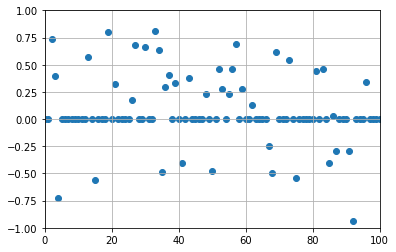

In [100]:
plt.scatter(x=topics_data.index, y = topics_data['compound'])
plt.xlim([0, 100])
plt.ylim([-1, 1])
plt.grid(True)
plt.show()

In [101]:
comments = subreddit.comments(limit=1000)

In [102]:
comment_dict = { 
                "link_id":[],
                "parent_id":[],
                "url":[], 
                "created": [], 
                "body":[],               
                "neg":[],
                  "neu":[],
                  "pos":[],
                    "compound":[]}

In [103]:
for comment in comments:
    comment_dict['link_id'].append(comment.link_id)
    comment_dict['parent_id'].append(comment.parent_id)
    comment_dict['url'].append(comment.link_url)
    comment_dict['created'].append(comment.created)
    comment_dict['body'].append(comment.body)
    comment_dict['neg'].append(sentiment_analyzer_scores(comment.body)['neg'])
    comment_dict['neu'].append(sentiment_analyzer_scores(comment.body)['neu'])
    comment_dict['pos'].append(sentiment_analyzer_scores(comment.body)['pos'])
    comment_dict['compound'].append(sentiment_analyzer_scores(comment.body)['compound'])

In [112]:
comment_data = pd.DataFrame(comment_dict)
comment_data = comment_data.assign(timestamp = _timestamp)
comment_data = comment_data.drop('created', axis=1)
comment_data.tail()


,link_id,parent_id,url,body,neg,neu,pos,compound,timestamp
972,t3_auvxsx,t1_ehc4696,https://www.reddit.com/r/ethtrader/comments/au...,It's a beverage startup that did an ICO,0.000,1.000,0.000,0.0000,2017-12-02 15:25:45
973,t3_auz3we,t1_ehcwwhr,https://insidebitcoins.com/news/nasdaq-finally...,BTW JP Morgan is basically running the entire ...,0.000,0.856,0.144,0.3680,2017-11-11 03:19:10
974,t3_auz3we,t1_ehcwwhr,https://insidebitcoins.com/news/nasdaq-finally...,Banks are using Ethereum not XRP.\n\nBasically...,0.000,1.000,0.000,0.0000,2017-06-21 16:53:07
975,t3_auvxsx,t1_ehcraik,https://www.reddit.com/r/ethtrader/comments/au...,Way slow,0.000,1.000,0.000,0.0000,2018-10-31 06:55:17
976,t3_av2mjm,t3_av2mjm,https://www.reddit.com/r/ethtrader/comments/av...,Wtf is Coineal?\n\nThat'll learn ya.,0.432,0.568,0.000,-0.5859,2017-12-31 08:40:50


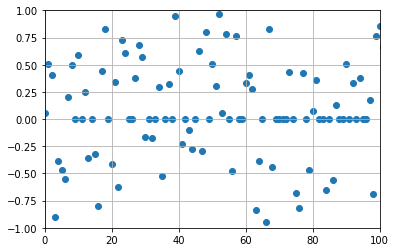

In [105]:
plt.scatter(x=comment_data.index, y = comment_data['compound'])
plt.xlim([0, 100])
plt.ylim([-1, 1])
plt.grid(True)
plt.show()

In [106]:
def word_cloud(comment):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in comment])
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        width = 1600,
        height = 800,
        random_state = 21,
        colormap = 'jet',
        max_words = 50,
        max_font_size=200).generate(all_words)
 
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show();      
    

In [107]:
def word_list(df):
    wrd_list = []
    for row in df.itertuples():
        wrd_list.append(row.body)
    return wrd_list
    

In [108]:
reddit_comments = word_list(comment_data)

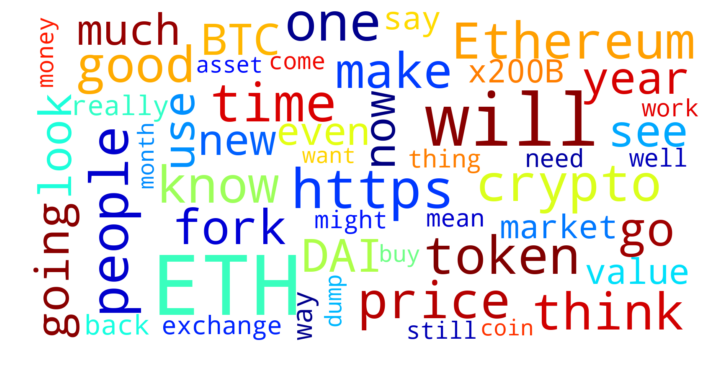

In [109]:
word_cloud(reddit_comments)